In [1]:
#We import the libraries we're going to use.
%load_ext autoreload
%autoreload 2

import project_functions as pf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
import folium
import json
import zipfile
import os
import kaggle


In [2]:
#We're going to use kaggle API to download our dataset.
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
#We look for the available datasets for our search "lapd-crime"
!kaggle datasets list -s 'lapd-crime'

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kushsheth/los-angeles-police-department-lapd-crime-data          Los Angeles Police Department (LAPD) Crime Data   36MB  2024-09-10 10:32:53            529         22  1.0              
ishmaelkiptoo/usa-los-angeles-crimes-data-2020-to-2023           USA, Los Angeles Crimes Data: 2020 To 2023        41MB  2023-11-14 05:31:05           1195         32  1.0              
hemil26/crime-in-los-angeles                                     Los Angeles Crime Data                            43MB  2024-07-30 21:47:45           2099         75  1.0              
saurabhbadole/crime-incidents-in-los-angeles-2020-to-present     Crime

In [4]:
#We download the dataset we are interested in.
!kaggle datasets download -d "kushsheth/los-angeles-police-department-lapd-crime-data"

Dataset URL: https://www.kaggle.com/datasets/kushsheth/los-angeles-police-department-lapd-crime-data
License(s): CC0-1.0




  0%|          | 0.00/36.4M [00:00<?, ?B/s]
  3%|2         | 1.00M/36.4M [00:00<00:12, 2.86MB/s]
  8%|8         | 3.00M/36.4M [00:00<00:05, 6.97MB/s]
 19%|#9        | 7.00M/36.4M [00:00<00:02, 15.3MB/s]
 27%|##7       | 10.0M/36.4M [00:01<00:02, 11.4MB/s]
 33%|###2      | 12.0M/36.4M [00:01<00:02, 11.3MB/s]
 41%|####1     | 15.0M/36.4M [00:01<00:01, 13.1MB/s]
 47%|####6     | 17.0M/36.4M [00:01<00:01, 14.3MB/s]
 60%|######    | 22.0M/36.4M [00:01<00:00, 21.6MB/s]
 74%|#######4  | 27.0M/36.4M [00:01<00:00, 27.9MB/s]
 85%|########5 | 31.0M/36.4M [00:01<00:00, 31.0MB/s]
 96%|#########6| 35.0M/36.4M [00:01<00:00, 29.7MB/s]
100%|##########| 36.4M/36.4M [00:01<00:00, 19.2MB/s]


In [5]:
#Now we unzip it.
z= zipfile.ZipFile('los-angeles-police-department-lapd-crime-data.zip')

z.extractall()

In [6]:
#We create a dataframe from the csv file.
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df

,DR_NO,Date_Reported,Date_occured,Time_occured,Area,Crime_Code,Victim_age,Victim_sex,Victim_descent,Premis,Weapon,Status,LOCATION,LAT,LON
0,190326475,03/01/20 0:00,03/01/20 0:00,2130,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/20 0:00,02/08/20 0:00,1800,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/20 0:00,11/04/20 0:00,1700,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/23 0:00,03/10/20 0:00,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,THEFT OF IDENTITY,28,M,H,SIDEWALK,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974472,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,Wilshire,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,Invest Cont,4000 W 23RD ST,34.0362,-118.3284
974473,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,Central,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,X,X,HOTEL,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,1300 W SUNSET BL,34.0685,-118.2460
974474,241711348,07/19/2024 12:00:00 AM,07/19/2024 12:00:00 AM,757,Devonshire,TRESPASSING,0,X,X,MTA - ORANGE LINE - CHATSWORTH,NaN,Invest Cont,10000 OLD DEPOT PLAZA RD,34.2500,-118.5990
974475,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,Southwest,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",70,F,W,SIDEWALK,STICK,Invest Cont,FLOWER ST,34.0215,-118.2868


In [8]:
#We check the number of rows and columns in the DF.
df.shape

(974477, 15)

In [9]:
#We check the column titles to see if they need cleaning.
df.columns

Index(['DR_NO', 'Date_Reported', 'Date_occured', 'Time_occured', 'Area',
       'Crime_Code', 'Victim_age', 'Victim_sex', 'Victim_descent', 'Premis',
       'Weapon', 'Status', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [10]:
#We clean the column titles so they are standardized.
##We rename two of the columns appropriately.
pf.clean_columns_1(df)

In [11]:
#We check if there are any duplicated rows in the DF.
df.duplicated().sum()

0

In [12]:
df.columns

Index(['file_number', 'date_reported', 'date_occured', 'time_occured', 'area',
       'crime_code', 'victim_age', 'victim_sex', 'victim_descent', 'premise',
       'weapon', 'status', 'location', 'lat', 'lon'],
      dtype='object')

In [13]:
#We check if there are any null values.
df.isna().sum()

file_number            0
date_reported          0
date_occured           0
time_occured           0
area                   0
crime_code             0
victim_age             0
victim_sex        136003
victim_descent    136013
premise              584
weapon            648695
status                 0
location               0
lat                    0
lon                    0
dtype: int64

In [14]:
#Now we'll start dealing with the nulls.

In [15]:
df["victim_descent"].unique()

array(['O', 'X', 'H', 'B', 'W', nan, 'A', 'K', 'C', 'J', 'F', 'I', 'V',
       'S', 'P', 'Z', 'G', 'U', 'D', 'L', '-'], dtype=object)

In [16]:
pf.descent_cleaning(df)

In [17]:
#We check to see if the renaming of the elements in the column worked.
df["victim_descent"].unique()

array(['other', 'not_specified', 'hispanic', 'black', 'white', 'asian',
       'korean', 'chinese', 'japanese', 'filipino', 'american indian',
       'vietnamese', 'samoan', 'pacific islander', 'asian indian',
       'guamanian', 'hawaiian', 'cambodian', 'laotian'], dtype=object)

In [18]:
#We check to see if we treated the nulls correctly.
df["victim_descent"].isna().sum()

0

In [19]:
#We're checking for nulls.
df.isna().sum()

file_number            0
date_reported          0
date_occured           0
time_occured           0
area                   0
crime_code             0
victim_age             0
victim_sex        136003
victim_descent         0
premise              584
weapon            648695
status                 0
location               0
lat                    0
lon                    0
dtype: int64

In [20]:
#We're checking to see if there are hidden nulls.
df["victim_sex"].value_counts()

victim_sex
M    394539
F    350930
X     92893
H       111
-         1
Name: count, dtype: int64

In [21]:
pf.sex_cleaning(df)

In [22]:
#We check if it worked.
df["victim_sex"].value_counts()

victim_sex
M                394539
F                350930
not_specified    229008
Name: count, dtype: int64

In [23]:
#We check if we handled nulls correctly.
df.isna().sum()

file_number            0
date_reported          0
date_occured           0
time_occured           0
area                   0
crime_code             0
victim_age             0
victim_sex             0
victim_descent         0
premise              584
weapon            648695
status                 0
location               0
lat                    0
lon                    0
dtype: int64

In [24]:
#We're checking for nulls.
df["victim_age"].isna().sum()

0

In [25]:
#We're checking to see if there are "hidden" nulls. Here, age=0 is considered a null.
df["victim_age"].value_counts()

victim_age
 0      255459
 30      21761
 35      21295
 31      20894
 29      20828
         ...  
 98         71
-2          27
-3           5
-4           3
 120         1
Name: count, Length: 104, dtype: int64

In [26]:
#We're standardizing all mistaken inputs to 0 (null)
pf.age_cleaning(df)

In [27]:
#We check if it worked.
df["victim_age"].value_counts()

victim_age
0     255590
30     21761
35     21295
31     20894
29     20828
       ...  
94       103
95        99
96        95
97        72
98        71
Name: count, Length: 99, dtype: int64

In [28]:
#We drop the rows where "premise" is null beacause they don't represent a significant amount of the DF.
pf.premise_cleaning(df)

In [29]:
df.isna().sum()

file_number            0
date_reported          0
date_occured           0
time_occured           0
area                   0
crime_code             0
victim_age             0
victim_sex             0
victim_descent         0
premise                0
weapon            648314
status                 0
location               0
lat                    0
lon                    0
dtype: int64

In [30]:
#We check for nulls 
df["weapon"].isna().sum()

648314

In [31]:
pf.weapon_cleaning(df)

In [32]:
#We check if it works.
df["weapon"].isna().sum()

0

In [33]:
#Now we're going to clean the date and time.

In [34]:
df.head()

,file_number,date_reported,date_occured,time_occured,area,crime_code,victim_age,victim_sex,victim_descent,premise,weapon,status,location,lat,lon
0,190326475,03/01/20 0:00,03/01/20 0:00,2130,Wilshire,VEHICLE - STOLEN,0,M,other,STREET,not_specified,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/20 0:00,02/08/20 0:00,1800,Central,BURGLARY FROM VEHICLE,47,M,other,BUS STOP/LAYOVER (ALSO QUERY 124),not_specified,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/20 0:00,11/04/20 0:00,1700,Southwest,BIKE - STOLEN,19,not_specified,not_specified,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",not_specified,Invest Cont,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/23 0:00,03/10/20 0:00,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,other,CLOTHING STORE,not_specified,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,THEFT OF IDENTITY,28,M,hispanic,SIDEWALK,not_specified,Invest Cont,1900 TRANSIENT,34.0944,-118.3277


In [35]:
pf.date_cleaning(df)

C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py:154: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.loc[:, 'date_reported'] = pd.to_datetime(df['date_reported'], errors = "coerce").dt.date
C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py:162: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.loc[:, 'date_occured'] = pd.to_datetime(df['date_occured'], errors = "coerce").dt.date


In [36]:
df.head()

,file_number,date_reported,date_occured,time_occured,area,crime_code,victim_age,victim_sex,victim_descent,premise,...,status,location,lat,lon,dr_year,dr_month,dr_day,do_year,do_month,do_day
0,190326475,2020-03-01,2020-03-01,21:30,Wilshire,VEHICLE - STOLEN,0,M,other,STREET,...,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,2020,3,1,2020,3,1
1,200106753,2020-02-09,2020-02-08,18:00,Central,BURGLARY FROM VEHICLE,47,M,other,BUS STOP/LAYOVER (ALSO QUERY 124),...,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,2020,2,9,2020,2,8
2,200320258,2020-11-11,2020-11-04,17:00,Southwest,BIKE - STOLEN,19,not_specified,not_specified,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",...,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,2020,11,11,2020,11,4
3,200907217,2023-05-10,2020-03-10,20:37,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,other,CLOTHING STORE,...,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,2023,5,10,2020,3,10
4,220614831,2022-08-18,2020-08-17,12:00,Hollywood,THEFT OF IDENTITY,28,M,hispanic,SIDEWALK,...,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,2022,8,18,2020,8,17


In [37]:
df.dtypes

file_number                int64
date_reported     datetime64[ns]
date_occured      datetime64[ns]
time_occured              object
area                      object
crime_code                object
victim_age                 int64
victim_sex                object
victim_descent            object
premise                   object
weapon                    object
status                    object
location                  object
lat                      float64
lon                      float64
dr_year                    int32
dr_month                   int32
dr_day                     int32
do_year                    int32
do_month                   int32
do_day                     int32
dtype: object

In [38]:
#NOW WE HAVE A CLEANED DF. NOW WE CAN START WORKING WITH IT.

In [39]:
#First, we're going to create "categories" for the weapons, crime_code and premise.

In [40]:
#We check the unique values for weapon.
df["weapon"].unique()

array(['not_specified', 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'VEHICLE', 'UNKNOWN WEAPON/OTHER WEAPON', 'VERBAL THREAT',
       'BELT FLAILING INSTRUMENT/CHAIN', 'HAND GUN', 'UNKNOWN FIREARM',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'FIXED OBJECT',
       'KITCHEN KNIFE', 'MACHETE', 'UNKNOWN TYPE CUTTING INSTRUMENT',
       'MACE/PEPPER SPRAY', 'STICK', 'OTHER KNIFE', 'PHYSICAL PRESENCE',
       'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'HAMMER',
       'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'SEMI-AUTOMATIC PISTOL',
       'SIMULATED GUN', 'RAZOR', 'OTHER FIREARM', 'FOLDING KNIFE',
       'PIPE/METAL PIPE', 'ROCK/THROWN OBJECT', 'RIFLE',
       'OTHER CUTTING INSTRUMENT', 'FIRE', 'REVOLVER', 'BOTTLE',
       'SCISSORS', 'SWITCH BLADE', 'BRASS KNUCKLES', 'CLUB/BAT',
       'BLUNT INSTRUMENT', 'BOARD', 'STUN GUN', 'CLEAVER', 'RAZOR BLADE',
       'SCREWDRIVER', 'SHOTGUN', 'CONCRETE BLOCK/BRICK',
       'CAUSTIC CHEMICAL/POISON', 'SEMI-AUTOMATIC RIFLE',
       'SCALDI

In [41]:
#We call a function to group weapons by class.
df.loc[:, 'weapon_class'] = df['weapon'].apply(pf.weapon_class)
# Display the updated DataFrame
print(df[['weapon', 'weapon_class']])

                             weapon   weapon_class
0                     not_specified  not_specified
1                     not_specified  not_specified
2                     not_specified  not_specified
3                     not_specified  not_specified
4                     not_specified  not_specified
...                             ...            ...
974472                not_specified  not_specified
974473  UNKNOWN WEAPON/OTHER WEAPON  not_specified
974474                not_specified  not_specified
974475                        STICK   blunt_weapon
974476                not_specified  not_specified

[973893 rows x 2 columns]


In [42]:
#We check to see the value counts for each weapons class.
df["weapon_class"].value_counts()

weapon_class
not_specified    690638
bare_hands       195189
other             43252
blade             21569
blunt_weapon      10197
rifle              7999
handgun            3073
long_blade         1639
shotgun             337
Name: count, dtype: int64

In [43]:
#We check the unique values for crime_code.

df["crime_code"].unique()

array(['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT OF IDENTITY',
       'BATTERY - SIMPLE ASSAULT',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'CHILD ANNOYING (17YRS & UNDER)',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'LEWD CONDUCT',
       'THEFT PLAIN - ATTEMPT', 'BURGLARY',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 'ROBBERY',
       'BUNCO, GRAND THEFT', 'BATTERY WITH SEXUAL CONTACT',
       'INTIMATE PARTNER - AGGRAVA

In [44]:
#We call a function to group crimes by class.

df.loc[:, 'crime_categories'] = df['crime_code'].apply(pf.crime_categories)

# Display the updated DataFrame
print(df[['crime_code', 'crime_categories']])

                                            crime_code       crime_categories
0                                     VEHICLE - STOLEN  theft_related_offense
1                                BURGLARY FROM VEHICLE  theft_related_offense
2                                        BIKE - STOLEN  theft_related_offense
3             SHOPLIFTING-GRAND THEFT ($950.01 & OVER)  theft_related_offense
4                                    THEFT OF IDENTITY  theft_related_offense
...                                                ...                    ...
974472                                VEHICLE - STOLEN  theft_related_offense
974473        VANDALISM - MISDEAMEANOR ($399 OR UNDER)         property_crime
974474                                     TRESPASSING         property_crime
974475  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT          violent_crime
974476                                VEHICLE - STOLEN  theft_related_offense

[973893 rows x 2 columns]


In [45]:
#We check to see if it worked correctly.
df["crime_categories"].unique()

array(['theft_related_offense', 'violent_crime', 'sex_crime',
       'public_order_offense', 'property_crime', 'miscellaneous_crime',
       'fraud'], dtype=object)

In [46]:
#We check to see the value counts for each crime class.

df["crime_categories"].value_counts()

crime_categories
theft_related_offense    564700
violent_crime            248020
property_crime           117563
sex_crime                 18323
public_order_offense      17555
miscellaneous_crime        7065
fraud                       667
Name: count, dtype: int64

In [47]:
#We check the unique values for crime_code.
df["premise"].unique()

array(['STREET', 'BUS STOP/LAYOVER (ALSO QUERY 124)',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'CLOTHING STORE',
       'SIDEWALK', 'SINGLE FAMILY DWELLING', 'CELL PHONE STORE',
       'CYBERSPACE', 'WEBSITE', 'OTHER BUSINESS', 'PARKING LOT',
       'OTHER RESIDENCE', 'AUTOMATED TELLER MACHINE (ATM)',
       'DEPARTMENT STORE', 'PUBLIC STORAGE', 'GARAGE/CARPORT',
       'OFFICE BUILDING/OFFICE', 'EQUIPMENT RENTAL', 'POLICE FACILITY',
       'MTA BUS', 'SPECIALTY SCHOOL/OTHER', 'BANK',
       'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)',
       'SKATING RINK*', 'BUS STOP', 'JUNIOR HIGH SCHOOL', 'OTHER/OUTSIDE',
       'ALLEY', 'VEHICLE, PASSENGER/TRUCK',
       'ABANDONED BUILDING ABANDONED HOUSE',
       'TRANSPORTATION FACILITY (AIRPORT)', 'MOTEL', 'HOSPITAL',
       'BUS, SCHOOL, CHURCH', 'OTHER PREMISE', 'STORAGE SHED',
       'OTHER STORE', 'HIGH SCHOOL', 'MAIL BOX', 'HOTEL',
       'NIGHT CLUB (OPEN EVENINGS ONLY)', 'FINANCE COMPANY',
       'PARK/PLAYGROUND'

In [48]:
#We call a function to group premises by class.

df.loc[:, 'premise_class'] = df['premise'].apply(pf.premise_class)

# Display the updated DataFrame
print(df[['premise', 'premise_class']])

                                             premise     premise_class
0                                             STREET      public_place
1                  BUS STOP/LAYOVER (ALSO QUERY 124)  public_transport
2       MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)  residential_area
3                                     CLOTHING STORE  commercial_space
4                                           SIDEWALK      public_place
...                                              ...               ...
974472                                        STREET      public_place
974473                                         HOTEL  residential_area
974474                MTA - ORANGE LINE - CHATSWORTH  public_transport
974475                                      SIDEWALK      public_place
974476                                   PARKING LOT      leisure_area

[973893 rows x 2 columns]


In [49]:
#We check to see if it worked correctly.
df["premise_class"].unique()

array(['public_place', 'public_transport', 'residential_area',
       'commercial_space', 'cyber_space', 'leisure_area',
       'financial_institutions', 'government_facilities',
       'educational_facilities', 'other', 'healthcare_facilities',
       'religious_facilities', 'industrial_facilities'], dtype=object)

In [50]:
#We check to see the value counts for each premise class.

df["premise_class"].value_counts()

premise_class
public_place              339804
residential_area          321850
public_transport          109152
leisure_area               80229
commercial_space           74699
other                      12220
educational_facilities      9646
government_facilities       8340
financial_institutions      6744
healthcare_facilities       6221
cyber_space                 2435
religious_facilities        2122
industrial_facilities        431
Name: count, dtype: int64

In [51]:
df.columns

Index(['file_number', 'date_reported', 'date_occured', 'time_occured', 'area',
       'crime_code', 'victim_age', 'victim_sex', 'victim_descent', 'premise',
       'weapon', 'status', 'location', 'lat', 'lon', 'dr_year', 'dr_month',
       'dr_day', 'do_year', 'do_month', 'do_day', 'weapon_class',
       'crime_categories', 'premise_class'],
      dtype='object')

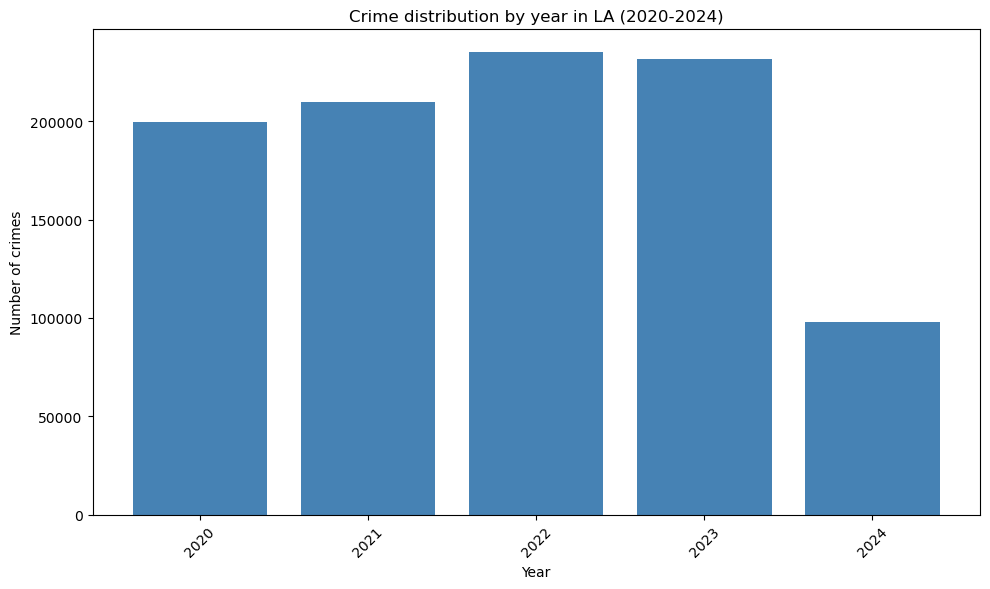

In [52]:
# Creating the bar graph
year_counts = df['do_year'].value_counts()
year = year_counts.index

plt.figure(figsize=(10, 6))
plt.bar(year, year_counts, color="steelblue")

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.title('Crime distribution by year in LA (2020-2024)')

# Displaying the graph
plt.xticks(rotation=45)
plt.tight_layout()
#plt.ylim(0, 200000)
plt.show()

In [53]:
#Data for the graphs
#weapon_class = ['not_specified', 'bare_hands', 'other', 'blade', 'blunt_weapon', 'rifle', 'handgun', 'long_blade', 'shotgun']
#weapon_counts = [690638, 195189, 43252, 21569, 10197, 7999, 3073, 1639, 337]


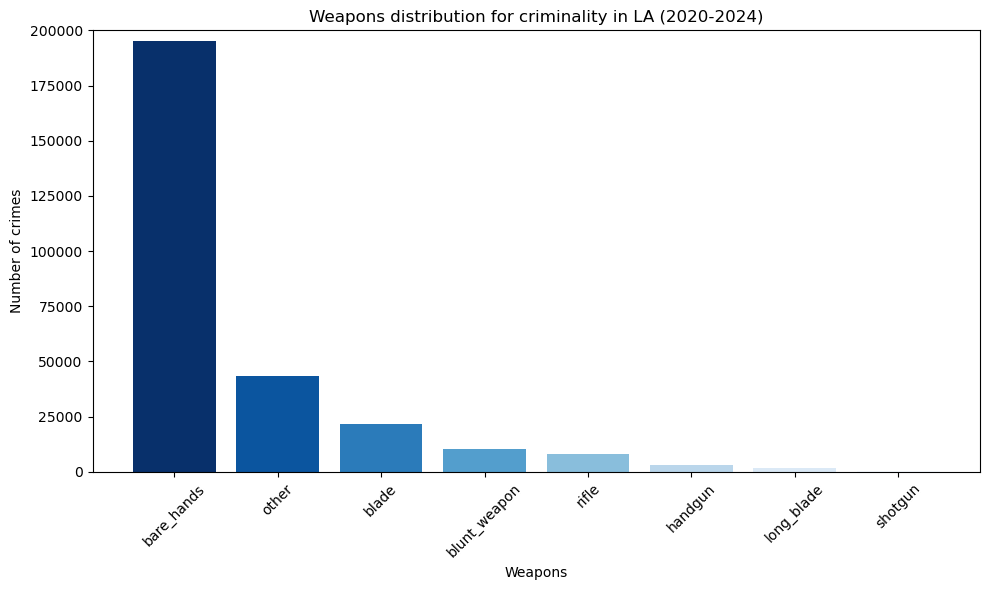

In [54]:
# Creating the bar graph
weapon_counts = df['weapon_class'].value_counts()[1:]
weapon_class = weapon_counts.index

plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(1, 0, len(weapon_class)))
plt.bar(weapon_class, weapon_counts, color=colors)

# Adding labels and title
plt.xlabel('Weapons')
plt.ylabel('Number of crimes')
plt.title('Weapons distribution for criminality in LA (2020-2024)')

# Displaying the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 200000)
plt.show()

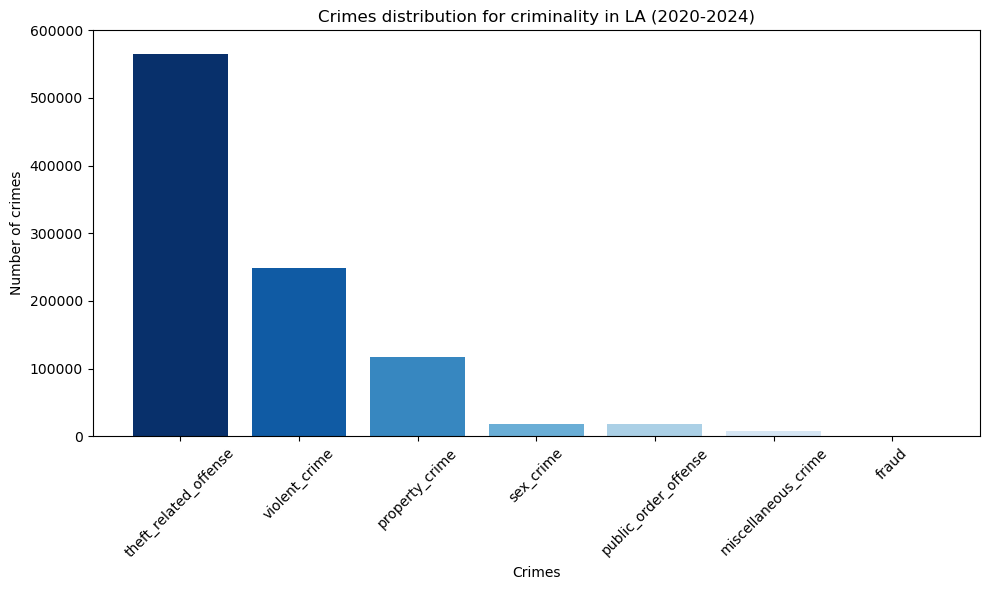

In [55]:
# Creating the bar graph

crime_categories_counts = df["crime_categories"].value_counts()
crime_categories = crime_categories_counts.index

plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(1, 0, len(crime_categories)))
plt.bar(crime_categories, crime_categories_counts, color=colors)

# Adding labels and title
plt.xlabel('Crimes')
plt.ylabel('Number of crimes')
plt.title('Crimes distribution for criminality in LA (2020-2024)')

# Displaying the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 600000)
plt.show()

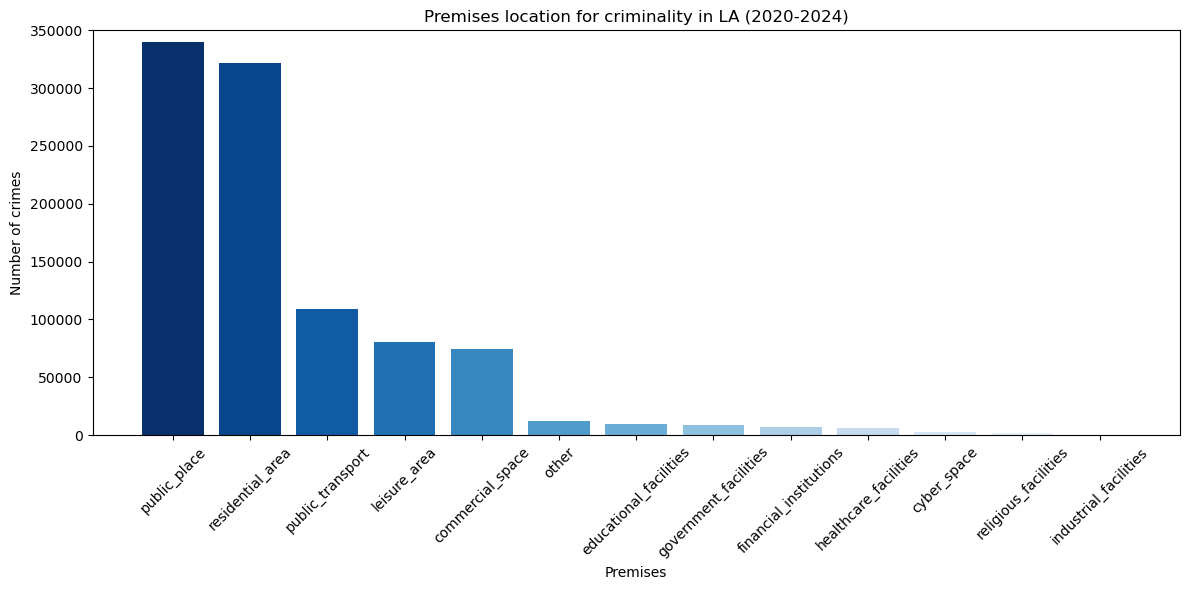

In [56]:
# Creating the bar graph

premise_class_counts = df["premise_class"].value_counts()
premise_class = premise_class_counts.index


plt.figure(figsize=(12, 6))
colors = plt.cm.Blues(np.linspace(1, 0, len(premise_class)))
plt.bar(premise_class, premise_class_counts, color=colors)

# Adding labels and title
plt.xlabel('Premises')
plt.ylabel('Number of crimes')
plt.title('Premises location for criminality in LA (2020-2024)')

# Displaying the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 350000)
plt.show()

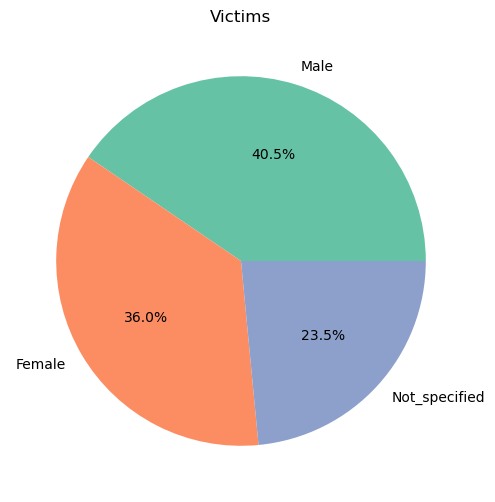

In [57]:
#Creating a pie chart
victim_counts = df['victim_sex'].value_counts()
victim_counts.index = victim_counts.index.map({'M': 'Male', 'F': 'Female', 'not_specified': 'Not_specified'})
plt.figure(figsize=(6, 6))
victim_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.get_cmap('Set2').colors)
plt.title('Victims')
plt.ylabel('')
plt.show()

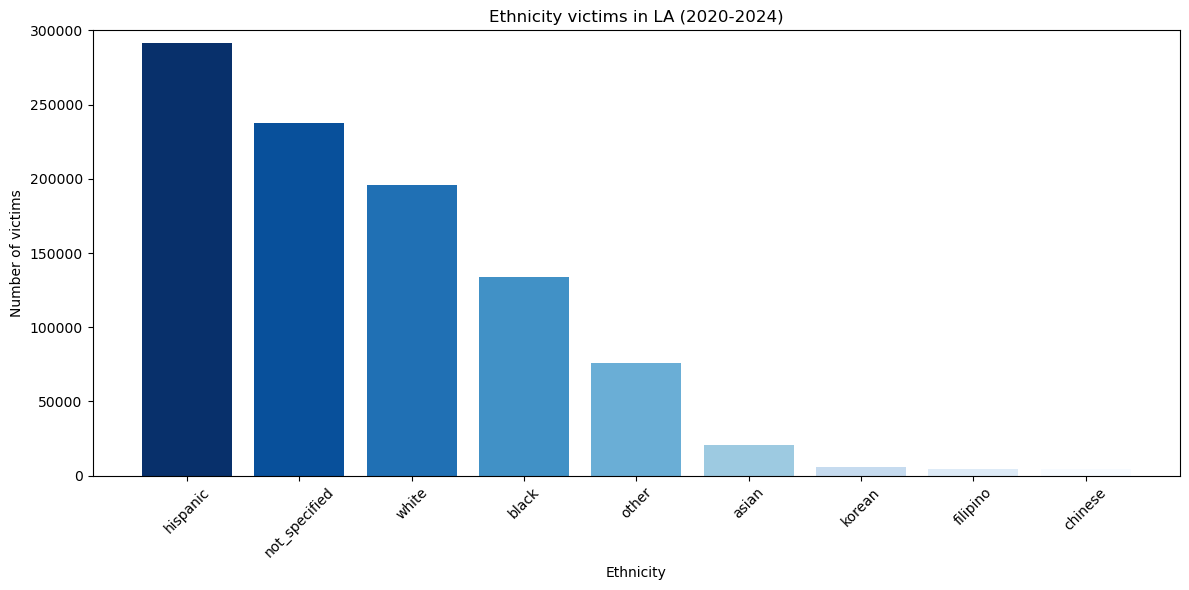

In [58]:
# Creating the bar graph for ethnicity.

victim_descent_counts = df['victim_descent'].value_counts()[:9]
victim_descent = victim_descent_counts.index

plt.figure(figsize=(12, 6))
colors = plt.cm.Blues(np.linspace(1, 0, len(victim_descent)))
plt.bar(victim_descent, victim_descent_counts, color=colors)

# Adding labels and title
plt.xlabel('Ethnicity')
plt.ylabel('Number of victims')
plt.title('Ethnicity victims in LA (2020-2024)')

# Displaying the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 300000)
plt.show()

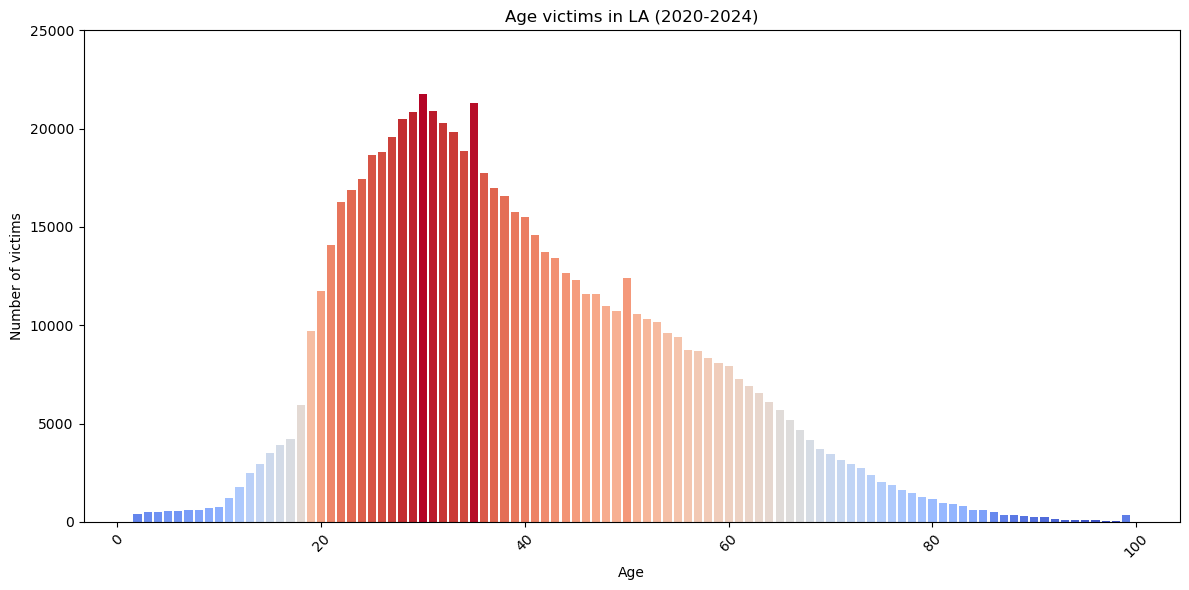

In [59]:
# Creating the bar graph for age. We removed the values = 0 which correspond to our "not_specified".

victim_age_counts = df['victim_age'].value_counts()[1:]
victim_age = victim_age_counts.index


#We applied a coolwarm color scale to effectively show the age distribution of the victims.
plt.figure(figsize=(12, 6))
colors = plt.cm.coolwarm(np.linspace(1, 0, len(victim_age)))
plt.bar(victim_age, victim_age_counts, color=colors)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Number of victims')
plt.title('Age victims in LA (2020-2024)')

# Displaying the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 25000)
plt.show()

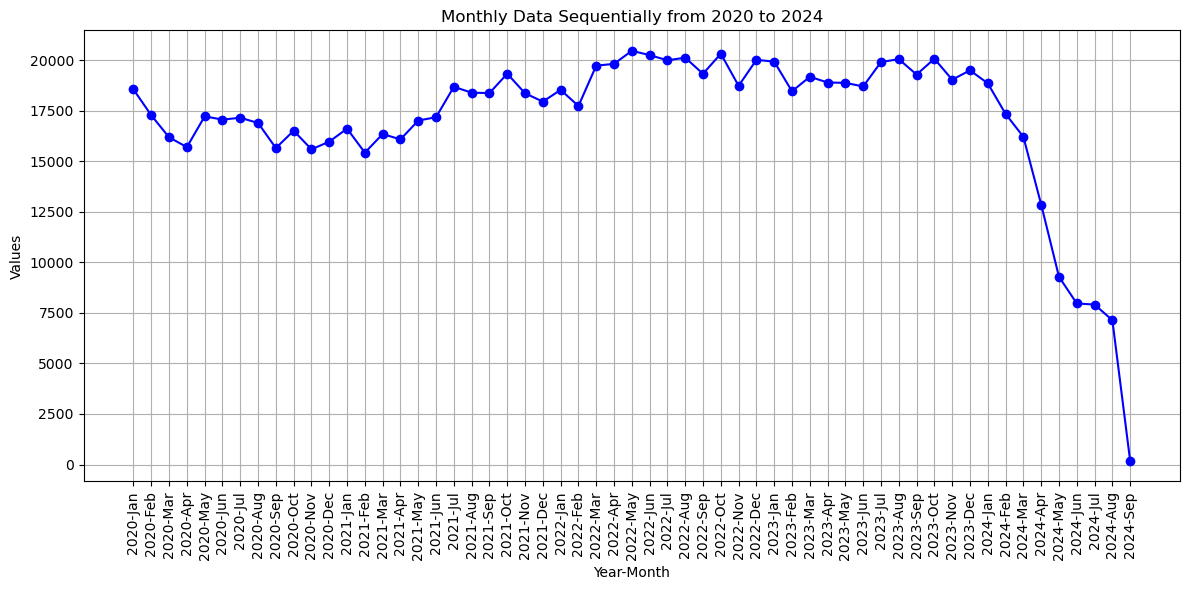

In [60]:
#The data for september 2024 is still work in progress because at time of the project, the data wasn't compiled yet.
# Data provided
data = {
    2020: [18546, 17268, 16179, 15696, 17216, 17055, 17147, 16889, 15648, 16505, 15586, 15965],
    2021: [16609, 15421, 16342, 16077, 17007, 17176, 18677, 18387, 18366, 19325, 18357, 17944],
    2022: [18527, 17727, 19723, 19812, 20456, 20246, 19988, 20118, 19320, 20315, 18726, 20010],
    2023: [19923, 18455, 19174, 18890, 18873, 18694, 19903, 20043, 19284, 20064, 19028, 19492],
    2024: [18848, 17338, 16204, 12857, 9283, 7964, 7909, 7136, 175]
}

# Prepare the data for plotting in a single sequence
all_months = []
all_values = []

# Adding all the data sequentially for all years
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for year, values in data.items():
    for i, value in enumerate(values):
        all_months.append(f'{year}-{months[i]}')
        all_values.append(value)

# Plot the data
plt.figure(figsize=(12,6))
plt.plot(all_months, all_values, marker='o', color='b')

# Add titles and labels
plt.title('Monthly Data Sequentially from 2020 to 2024')
plt.xlabel('Year-Month')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
df["do_year"].value_counts()

do_year
2022    234968
2023    231823
2021    209688
2020    199700
2024     97714
Name: count, dtype: int64

In [62]:
df["do_month"].value_counts()

do_month
1     92453
3     87622
2     86209
7     83624
4     83332
5     82835
8     82573
6     81135
10    76209
12    73411
9     72793
11    71697
Name: count, dtype: int64

In [63]:
grouped_1 = df.groupby(["do_year","do_month"]).agg({"do_month": "count"})

In [64]:
grouped_1 = grouped_1.rename(columns = {"do_month": "num_crimes"}).reset_index()

In [65]:
grouped_1

,do_year,do_month,num_crimes
0,2020,1,18546
1,2020,2,17268
2,2020,3,16179
3,2020,4,15696
4,2020,5,17216
5,2020,6,17055
6,2020,7,17147
7,2020,8,16889
8,2020,9,15648
9,2020,10,16505


In [66]:
df["categorized_time"] = df["time_occured"].apply(pf.categorize_cleaned_time)

In [67]:
df["categorized_time"].value_counts()

categorized_time
20:00-05:00    324970
17:00-20:00    168724
12:00-15:00    157655
08:00-12:00    155611
15:00-17:00    102411
05:00-08:00     64522
Name: count, dtype: int64

In [68]:
df.head()

,file_number,date_reported,date_occured,time_occured,area,crime_code,victim_age,victim_sex,victim_descent,premise,...,dr_year,dr_month,dr_day,do_year,do_month,do_day,weapon_class,crime_categories,premise_class,categorized_time
0,190326475,2020-03-01,2020-03-01,21:30,Wilshire,VEHICLE - STOLEN,0,M,other,STREET,...,2020,3,1,2020,3,1,not_specified,theft_related_offense,public_place,20:00-05:00
1,200106753,2020-02-09,2020-02-08,18:00,Central,BURGLARY FROM VEHICLE,47,M,other,BUS STOP/LAYOVER (ALSO QUERY 124),...,2020,2,9,2020,2,8,not_specified,theft_related_offense,public_transport,17:00-20:00
2,200320258,2020-11-11,2020-11-04,17:00,Southwest,BIKE - STOLEN,19,not_specified,not_specified,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",...,2020,11,11,2020,11,4,not_specified,theft_related_offense,residential_area,17:00-20:00
3,200907217,2023-05-10,2020-03-10,20:37,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,other,CLOTHING STORE,...,2023,5,10,2020,3,10,not_specified,theft_related_offense,commercial_space,20:00-05:00
4,220614831,2022-08-18,2020-08-17,12:00,Hollywood,THEFT OF IDENTITY,28,M,hispanic,SIDEWALK,...,2022,8,18,2020,8,17,not_specified,theft_related_offense,public_place,12:00-15:00


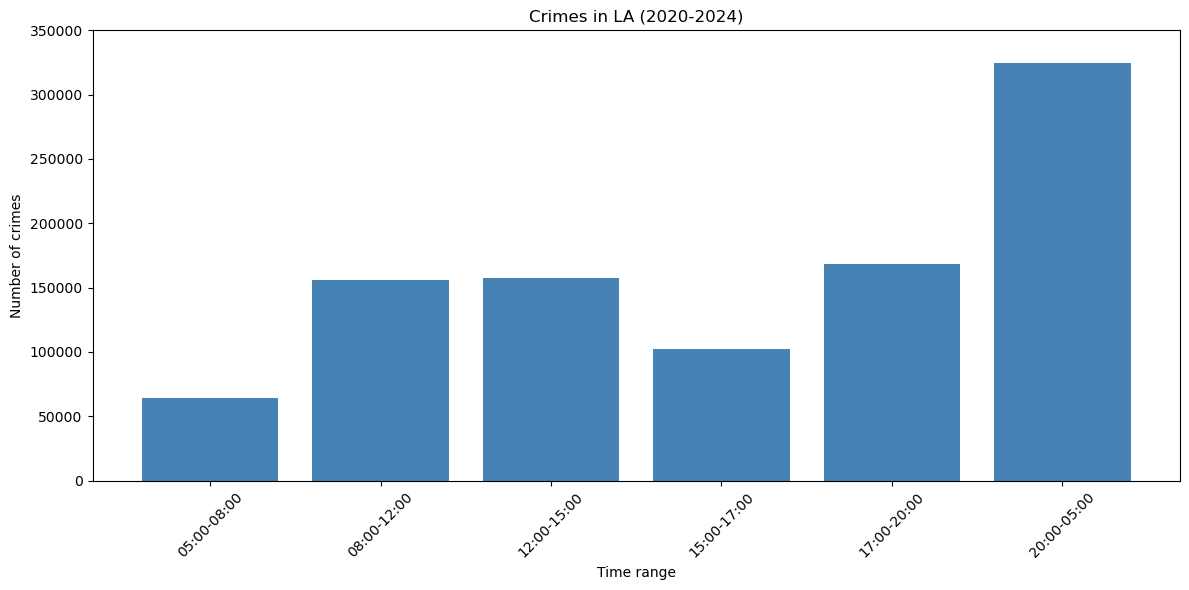

In [69]:
# Creating the bar graph for times of day. 

categorized_time_counts = df['categorized_time'].value_counts().sort_index()
categorized_time = categorized_time_counts.index


#We applied a coolwarm color scale to effectively show the age distribution of the victims.
plt.figure(figsize=(12, 6))
plt.bar(categorized_time, categorized_time_counts, color="steelblue")

# Adding labels and title
plt.xlabel('Time range')
plt.ylabel('Number of crimes')
plt.title('Crimes in LA (2020-2024)')

# Displaying the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 350000)
plt.show()

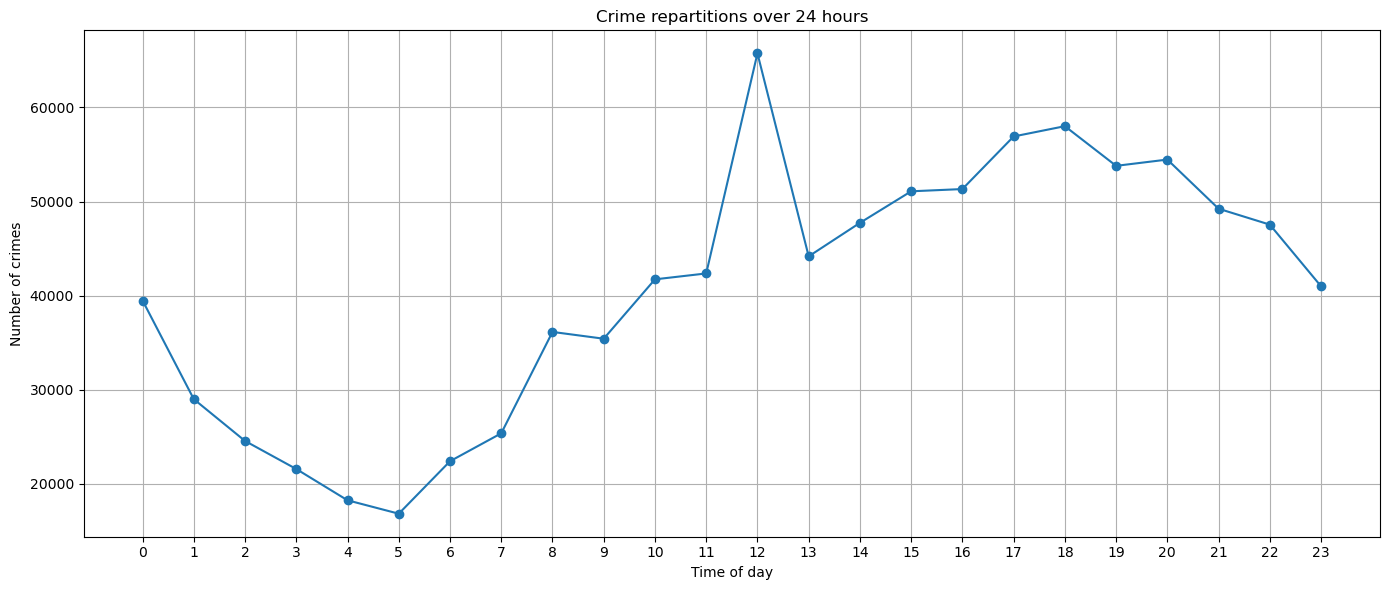

In [70]:
# Ensure 'time_occured' is in the correct format, then extract hour and minute
df['time_occured'] = pd.to_datetime(df['time_occured'], format='%H:%M')

# Create a new column for the time in minutes since midnight
df['time_in_minutes'] = df['time_occured'].dt.hour

# Count occurrences for each minute of the day
minute_counts = df['time_in_minutes'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(14, 6))
plt.plot(minute_counts.index, minute_counts.values, marker='o', linestyle='-')
plt.title('Crime repartitions over 24 hours')
plt.xlabel('Time of day')
plt.ylabel('Number of crimes')

# Set x-ticks to every hour
plt.xticks(ticks=range(0, 24))

plt.grid()
plt.tight_layout()
plt.show()

In [71]:
df["area"].value_counts()

area
Central        67072
77th Street    60447
Pacific        57145
Southwest      55299
Hollywood      50921
N Hollywood    49530
Southeast      48807
Olympic        48615
Newton         47830
Wilshire       46681
Rampart        45263
West LA        44315
Van Nuys       41526
Northeast      41478
West Valley    41031
Devonshire     40455
Topanga        40148
Harbor         40138
Mission        39021
Hollenbeck     35844
Foothill       32327
Name: count, dtype: int64

In [72]:
location_df =df[["area", "lon", "lat"]]

In [73]:
location_df = location_df.groupby(["area"]).agg({"area":"count", "lon": "median", "lat": "median"})

In [74]:
location_df.rename({"area": "crimes"}, axis=1, inplace=True)

In [75]:
location_df.reset_index(inplace=True)

In [76]:
location_df.head(21)

,area,crimes,lon,lat
0,77th Street,60447,-118.2939,33.9770
1,Central,67072,-118.2504,34.0466
2,Devonshire,40455,-118.5361,34.2480
3,Foothill,32327,-118.3934,34.2529
4,Harbor,40138,-118.2884,33.7765
5,Hollenbeck,35844,-118.2061,34.0504
6,Hollywood,50921,-118.3295,34.0998
7,Mission,39021,-118.4517,34.2394
8,N Hollywood,49530,-118.3823,34.1703
9,Newton,47830,-118.2619,34.0093


In [77]:
map = folium.Map(location=[location_df.lat.median(), location_df.lon.median()], zoom_start=10, control_scale=True)

In [78]:
for index, location_info  in location_df.iterrows():
    folium.Marker([location_info["lat"], location_info["lon"]], popup=location_info["area"]).add_to(map)

In [79]:
map

In [80]:
#Heat map

In [81]:
df["clean_weapon"] = df.loc[df["weapon_class"] != "not_specified", "weapon_class"]

In [82]:
crime_crosstab = pd.crosstab(df["clean_weapon"], df["crime_categories"])

In [83]:
crime_crosstab

crime_categories,fraud,miscellaneous_crime,property_crime,public_order_offense,sex_crime,theft_related_offense,violent_crime
clean_weapon,,,,,,,
bare_hands,131,217,4815,1279,4641,27974,156132
blade,8,11,340,22,34,4241,16913
blunt_weapon,2,8,839,16,20,1460,7852
handgun,0,6,147,0,5,580,2335
long_blade,0,2,46,0,1,181,1409
other,20,270,2889,922,575,5455,33121
rifle,5,13,759,5,11,2486,4720
shotgun,0,0,29,1,0,73,234


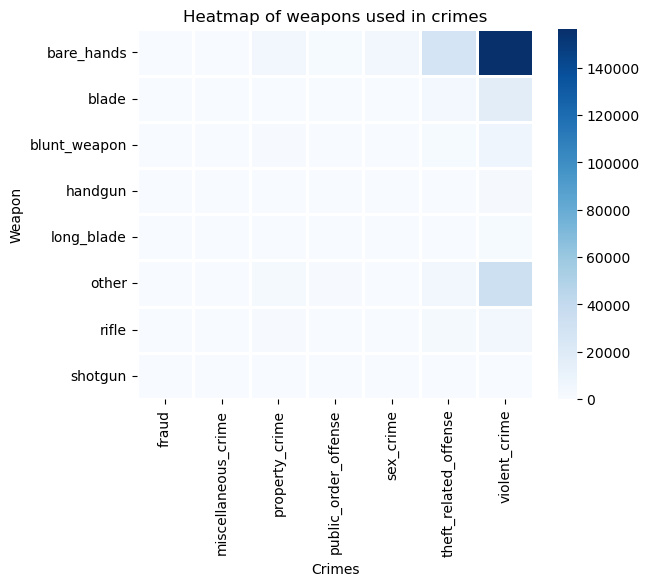

In [84]:
heat_map = sns.heatmap(crime_crosstab, linewidths = 1, cmap="Blues")

plt.title("Heatmap of weapons used in crimes")
plt.xlabel("Crimes")
plt.ylabel("Weapon")


plt.show()

In [85]:
location_crosstab = pd.crosstab(df["area"], df["crime_categories"])

In [86]:
location_crosstab

crime_categories,fraud,miscellaneous_crime,property_crime,public_order_offense,sex_crime,theft_related_offense,violent_crime
area,,,,,,,
77th Street,32,443,7160,1031,1031,29014,21736
Central,51,488,9778,528,963,36969,18295
Devonshire,24,322,4068,692,818,26181,8350
Foothill,28,263,4166,732,685,18129,8324
Harbor,30,281,5246,1404,725,21069,11383
Hollenbeck,23,196,4799,900,602,19352,9972
Hollywood,46,421,6396,715,1053,29164,13126
Mission,29,303,4210,1310,934,21776,10459
N Hollywood,16,410,7112,341,983,30109,10559


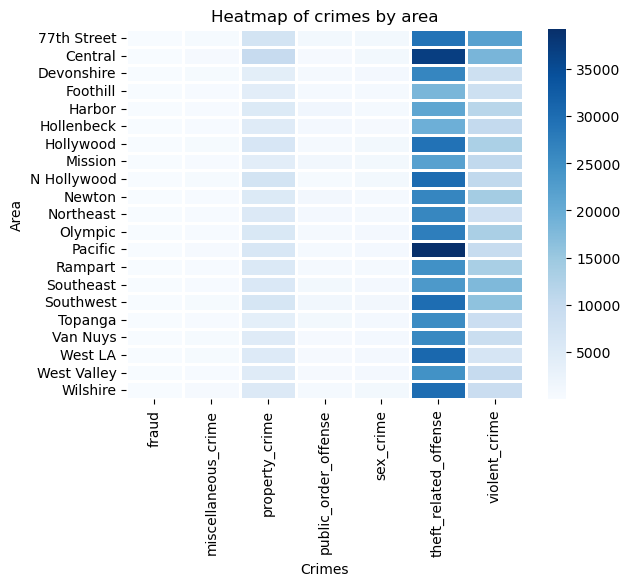

In [87]:
heat_map = sns.heatmap(location_crosstab, linewidths = 1, cmap="Blues")

plt.title("Heatmap of crimes by area")
plt.xlabel("Crimes")
plt.ylabel("Area")


plt.show()

In [88]:
df["clean_sex"] = df.loc[df["victim_sex"] != "not_specified", "victim_sex"]

In [89]:
sex_crosstab = pd.crosstab(df["crime_categories"],df["clean_sex"])

In [90]:
sex_crosstab

clean_sex,F,M
crime_categories,,
fraud,291,231
miscellaneous_crime,2293,2729
property_crime,42157,49526
public_order_offense,10711,4902
sex_crime,12776,4534
theft_related_offense,158232,213043
violent_crime,124419,119310


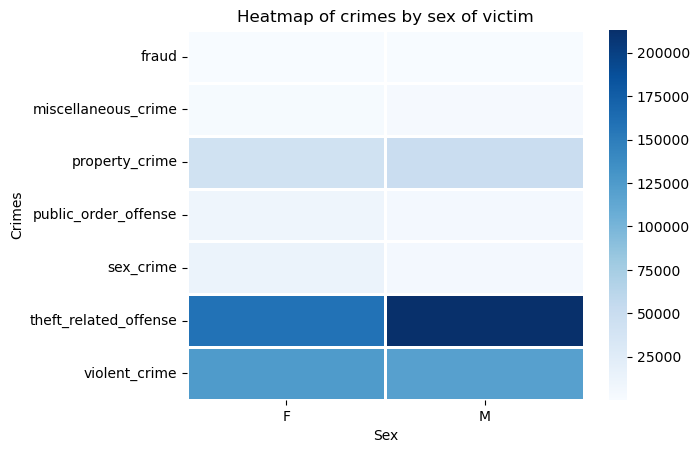

In [91]:
heat_map = sns.heatmap(sex_crosstab, linewidths = 1, cmap="Blues")

plt.title("Heatmap of crimes by sex of victim")
plt.xlabel("Sex")
plt.ylabel("Crimes")


plt.show()

In [92]:
#Additional information related to the project.
#This function webscrapes wikipedia for basic info about the President of the United States, mayor and LAPD chief.

In [93]:
pf.chief_info()

Name: Dominic Choi
Preceded by: Michel Moore
Born: Los Angeles, California, U.S.
Alma mater: University of Southern California
Department:  Los Angeles Police Department
Serviceyears: 1995–present
Rank:  Chief of police – 2024Sworn in as a Police Officer: 1995


C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py:294: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 294 of the file C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  chief_soup = BeautifulSoup(chief_response.content)


In [94]:
pf.mayor_info()

Name: Karen Bass
Style: Her Honor
Residence: Getty House
Term length: Four years (renewable once)
Inaugural holder: Alpheus P. Hodges
Formation: 1850
Salary: $269,365
Website: mayor.lacity.gov


C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py:325: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 325 of the file C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  mayor_soup = BeautifulSoup(mayor_response.content)


In [95]:
pf.president_info()

C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py:356: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 356 of the file C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  president_soup = BeautifulSoup(president_response.content)


Name: Joe Biden
Style: 
Mr. President[1][2] (informal)
The Honorable[3] (formal)
His Excellency[4][5] (diplomatic)

Type: 
Head of state
Head of government
Commander-in-chief

Abbreviation: POTUS
Member of: 
Cabinet
Domestic Policy Council
National Economic Council
National Security Council

Residence: White House
Seat: Washington, D.C.
Appointer: Electoral College or via succession
Term length: Four years, renewable once
Constituting instrument: Constitution of the United States
Formation: March 4, 1789(235 years ago) (1789-03-04)[6][7][8]
First holder: George Washington[9]
Salary: $400,000 per year[A]
Website: whitehouse.gov
